In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

from os.path import isfile, isdir, join

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from linevul_main import InputFeatures, convert_examples_to_features

# from dataset_gen_utils import boost_with_dupes

In [23]:
SRC_PATH = "../data/cat/cat_processed_data.csv"

In [16]:
df = pd.read_csv(SRC_PATH)
df.head()

/tmp/ipykernel_6268/1904970351.py:1: DtypeWarning: Columns (20,22,23,27,28,29,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(SRC_PATH)


,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
0,0,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,NaN,NaN
1,1,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,NaN,NaN
2,2,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,NaN,NaN
3,3,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,NaN,NaN
4,4,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,NaN,NaN


In [17]:
vul_df = df.query("target != 0")from sklearn.model_selection import train_test_split

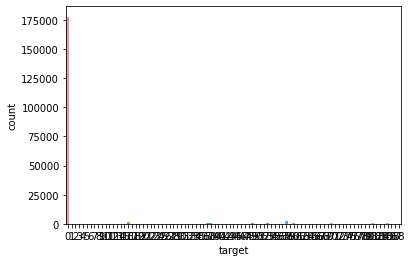

In [19]:
fig = sns.countplot(x="target", data=df).get_figure()

In [13]:
fig.savefig("../data/cat/vul_cnt.png")

In [133]:
X = df.drop("target", axis=1)
Y = df["target"]

type(X)

pandas.core.frame.DataFrame

In [143]:
def boost_with_dupes(df: pd.DataFrame, dup_cnt=10):
    Y_list = df["target"].tolist()
    
    unq_targets = set(Y_list)

    dupe_targets = []

    for tg in unq_targets:
        cnt = Y_list.count(tg)
        if cnt < 2:
            dupe_targets.append(tg)
    
    X_dupes = []

    for idx, row in df.iterrows():
        if row["target"] in dupe_targets:
            X_dupes.extend([row] * dup_cnt)
    
    new_df = df.append(pd.DataFrame(X_dupes))
    
    return new_df

In [155]:
# print(len(df.index))
new_df = boost_with_dupes(df)
# print(len(new_df.index))
len(new_df["target"])

/tmp/ipykernel_6268/1242448498.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append(pd.DataFrame(X_dupes))


186629

In [156]:
X_train_df, X_valtest_df, Y_train, Y_valtest = train_test_split(new_df, new_df["target"], test_size=0.2, stratify=new_df["target"])

In [157]:
type(X_train_df), type(X_valtest_df), type(Y_train), type(Y_valtest)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [159]:
print(len(X_valtest_df.index))
new_X_valtest_df = boost_with_dupes(X_valtest_df)
len(new_X_valtest_df["target"])

37326


/tmp/ipykernel_6268/1242448498.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append(pd.DataFrame(X_dupes))


37536

In [162]:
X_val_df, X_test_df, Y_val, Y_test = train_test_split(new_X_valtest_df, new_X_valtest_df["target"], test_size=0.5, stratify=new_X_valtest_df["target"])

In [164]:
X_train_len = len(X_train_df.index)
Y_train_len = len(Y_train)

X_val_len = len(X_val_df.index)
Y_val_len = len(Y_val)

X_test_len = len(X_test_df.index)
Y_test_len = len(Y_test)

print(X_train_len, Y_train_len)
print(X_val_len, Y_val_len)
print(X_test_len, Y_test_len)

print((X_train_len + X_val_len + X_test_len), (Y_train_len + Y_val_len + Y_test_len))
print(len(df.index))

149303 149303
18768 18768
18768 18768
186839 186839
186519


In [167]:
DST_DIR = "../data/cat"

filename_df_dict = {
    "train": {
        "filename": "cat_boost_train.csv",
        "dataframe": X_train_df
    },
    "val": {
        "filename": "cat_boost_val.csv",
        "dataframe": X_val_df
    },
    "test": {
        "filename": "cat_boost_test.csv",
        "dataframe": X_test_df
    }
}

for key in filename_df_dict:
    DST_PATH = join(DST_DIR, filename_df_dict[key]["filename"])
    
    if not isfile(DST_PATH):
        with open(DST_PATH, "w"):
            pass
    
    filename_df_dict[key]["dataframe"].to_csv(DST_PATH, index=False)

In [131]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'void DaemonProcess::CloseDesktopSession(int terminal_id) {\n  DCHECK(caller_task_runner()->BelongsToCurrentThread());\n\n  if (!IsTerminalIdKnown(terminal_id)) {\n    LOG(ERROR) << "An invalid terminal ID. terminal_id=" << terminal_id;\n    RestartNetworkProcess();\n    DeleteAllDesktopSessions();\n    return;\n  }\n\n  DesktopSessionList::iterator i;\n  for (i = desktop_sessions_.begin(); i != desktop_sessions_.end(); ++i) {\n    if ((*i)->id() == terminal_id) {\n      break;\n    }\n  }\n\n  if (i == desktop_sessions_.end())\n    return;\n\n  delete *i;\n  desktop_sessions_.erase(i);\n\n  VLOG(1) << "Daemon: closed desktop session " << terminal_id;\n  SendToNetwork(\n      new ChromotingDaemonNetworkMsg_TerminalDisconnected(terminal_id));\n}\n'

In [65]:
Y_list = Y.tolist()
unq_targets = set(Y_list)

dupe_targets = []

for tg in unq_targets:
    cnt = Y_list.count(tg)
    
    if cnt < 2:
        dupe_targets.append(tg)

In [66]:
print(type(X))

X_dupes = []
Y_dupes = []

dup_cnt = 10

for idx, entry in enumerate(X):
    if Y[idx] in dupe_targets:
        X_dupes.extend([entry] * dup_cnt)
        Y_dupes.extend([Y[idx]] * dup_cnt)

<class 'pandas.core.series.Series'>


In [67]:
print(len(X), len(Y))

X = X.append(pd.Series(X_dupes))
Y = Y.append(pd.Series(Y_dupes))

print(len(X), len(Y))

186519 186519
186629 186629


/tmp/ipykernel_6268/1448872349.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.append(pd.Series(X_dupes))
/tmp/ipykernel_6268/1448872349.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y = Y.append(pd.Series(Y_dupes))


In [68]:
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [69]:
Y_valtest_list = Y_valtest.tolist()
valtest_unq_targets = set(Y_valtest_list)

valtest_dupe_targets = []

for tg in valtest_unq_targets:
    cnt = Y_valtest_list.count(tg)
    
    if cnt < 2:
        valtest_dupe_targets.append(tg)
        print(cnt, tg)

1 12
1 13
1 19
1 23
1 27
1 28
1 29
1 34
1 35
1 40
1 43
1 55
1 63
1 64
1 68
1 69
1 73
1 80
1 83
1 86
1 88


In [ ]:
X_valtest_dupes = []
Y_valtest_dupes = []

dup_cnt = 10

for idx, entry in enumerate(X_valtest):
    if Y_valtest[idx] in valtest_dupe_targets:
        X_dupes.extend([entry] * dup_cnt)
        Y_dupes.extend([Y[idx]] * dup_cnt)

print(len(X), len(Y))

X = X.append(pd.Series(X_dupes))
Y = Y.append(pd.Series(Y_dupes))

print(len(X), len(Y))

In [62]:
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest, test_size=0.5, stratify=Y_valtest)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.